In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = (15, 15)
from IPython.display  import Image

In [16]:
image = cv2.imread('signature.jpg',cv2.IMREAD_COLOR)

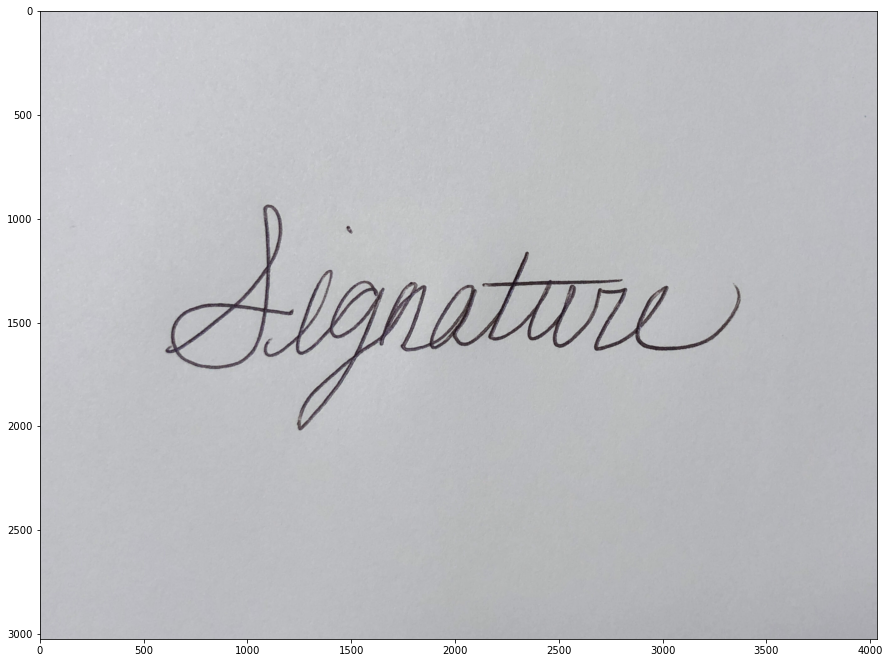

In [18]:
plt.imshow(image)

In [19]:
image.shape

(3024, 4032, 3)

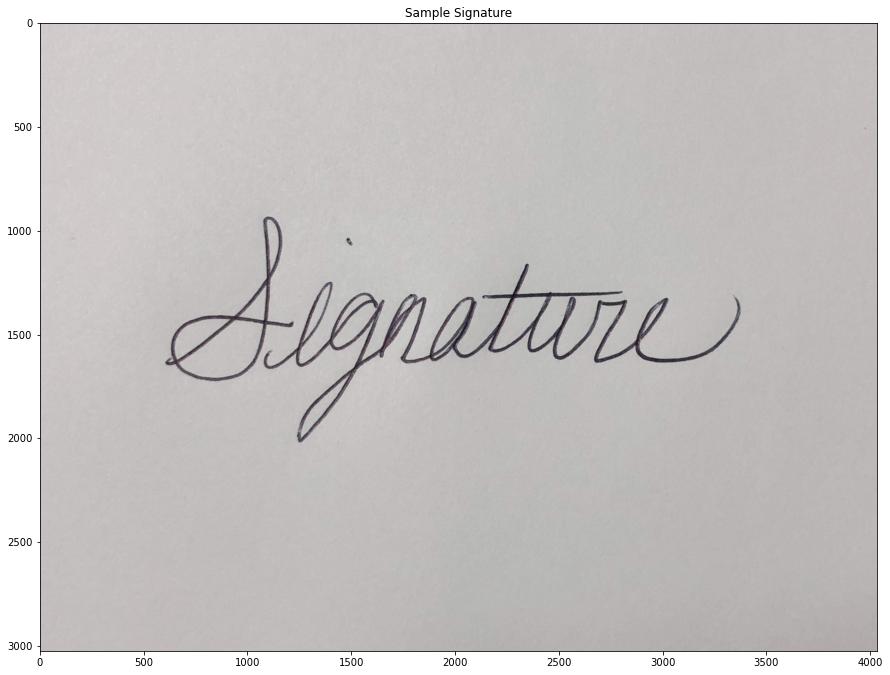

In [32]:
# Display the image using imshow() so we can see the size with axis.
plt.imshow(image[:, :, ::-1])
plt.title('Sample Signature');

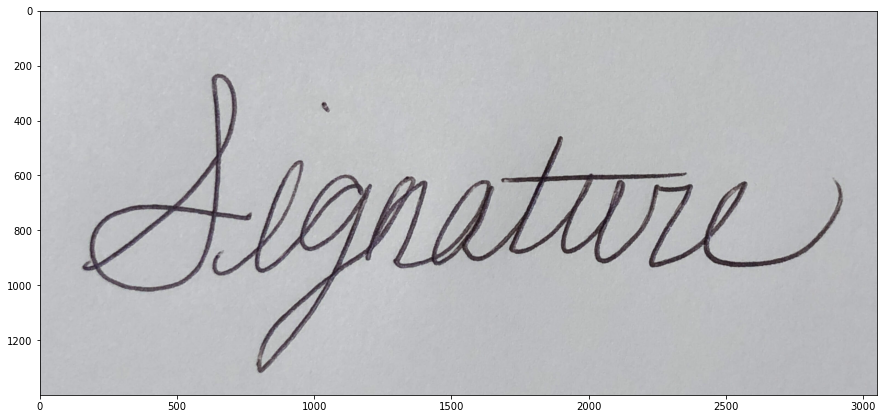

In [36]:
# Crop the signature from the original image.
sig = image[700:2100, 450:3500, :]
plt.imshow(sig);

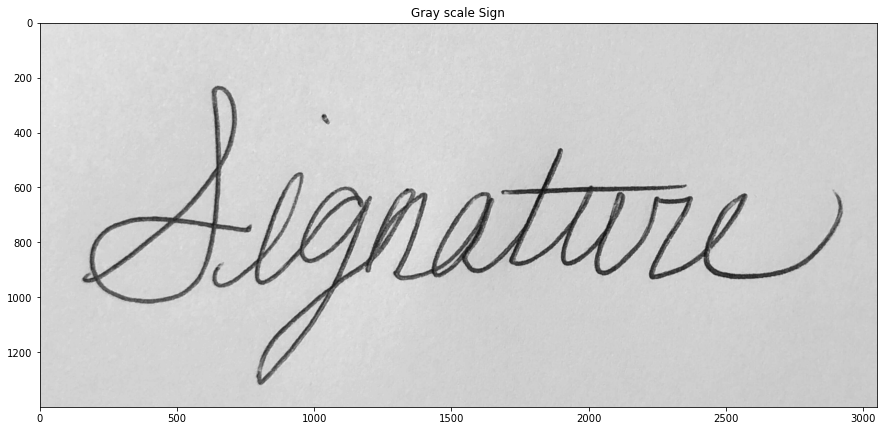

In [38]:
sig_gray = cv2.cvtColor(sig, cv2.COLOR_BGR2GRAY)
plt.imshow(sig_gray)
plt.title('Gray scale Sign');

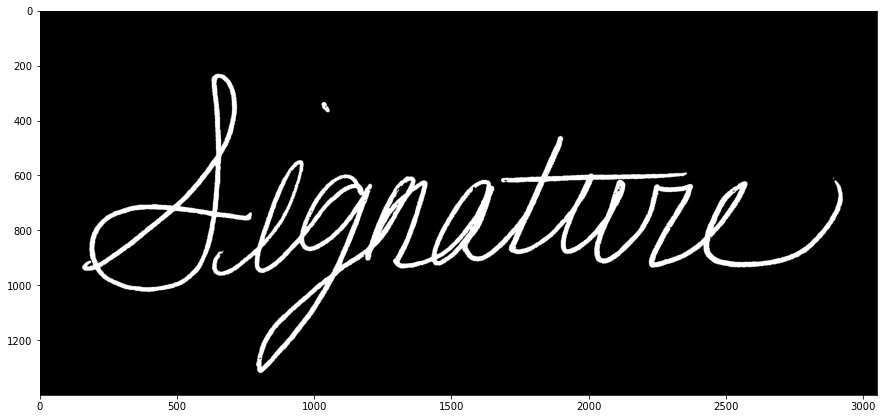

In [39]:
ret, alpha_mask = cv2.threshold(sig_gray, 150, 255, cv2.THRESH_BINARY_INV)
plt.imshow(alpha_mask)

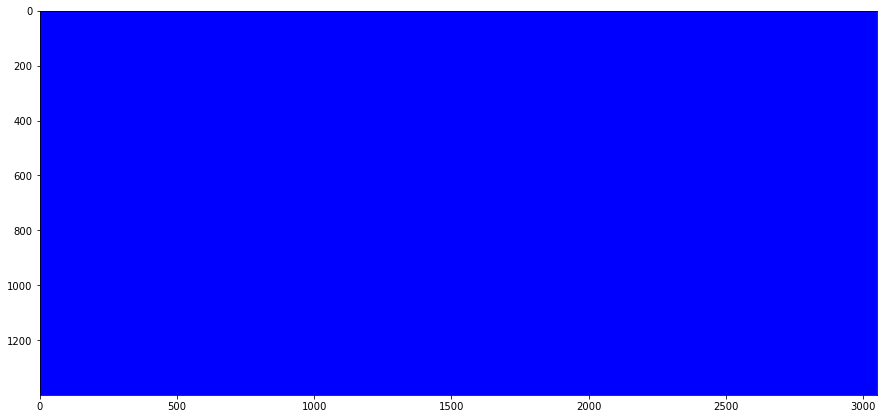

In [45]:
blue= sig.copy()
blue[:,:]=(255,0,0)
plt.imshow(blue[:,:,::-1])

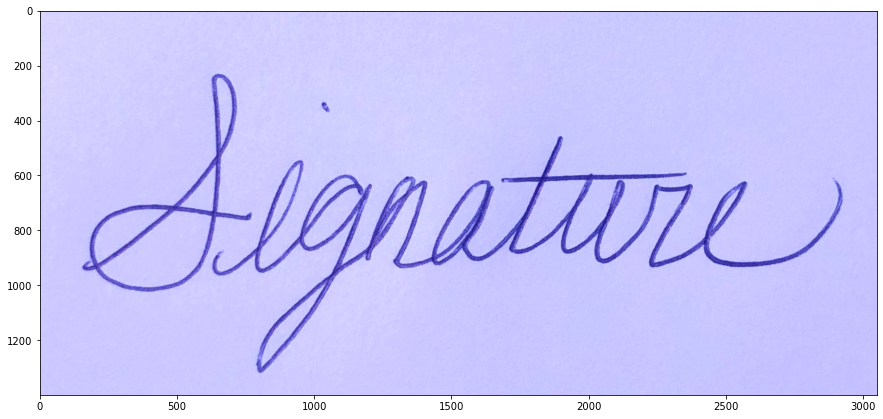

In [46]:
update_image= cv2.addWeighted(sig,1,blue,0.4,9)
plt.imshow(update_image[:,:,::-1])

In [47]:
b,g,r = cv2.split(update_image)

In [48]:
b.shape

(1400, 3050)

In [49]:
g.shape

(1400, 3050)

In [50]:
new_image= cv2.merge([b,g,r,alpha_mask],4)

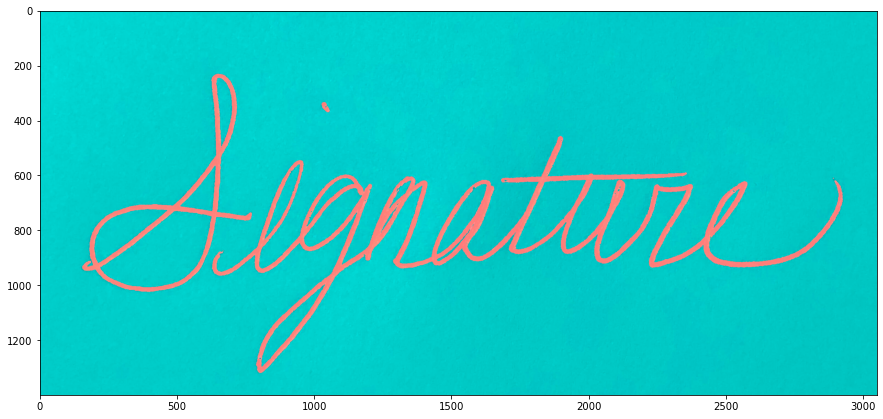

In [52]:
plt.imshow(new_image[:,:,::-1])

In [53]:
cv2.imwrite('extracted_sig.png', new_image)


True

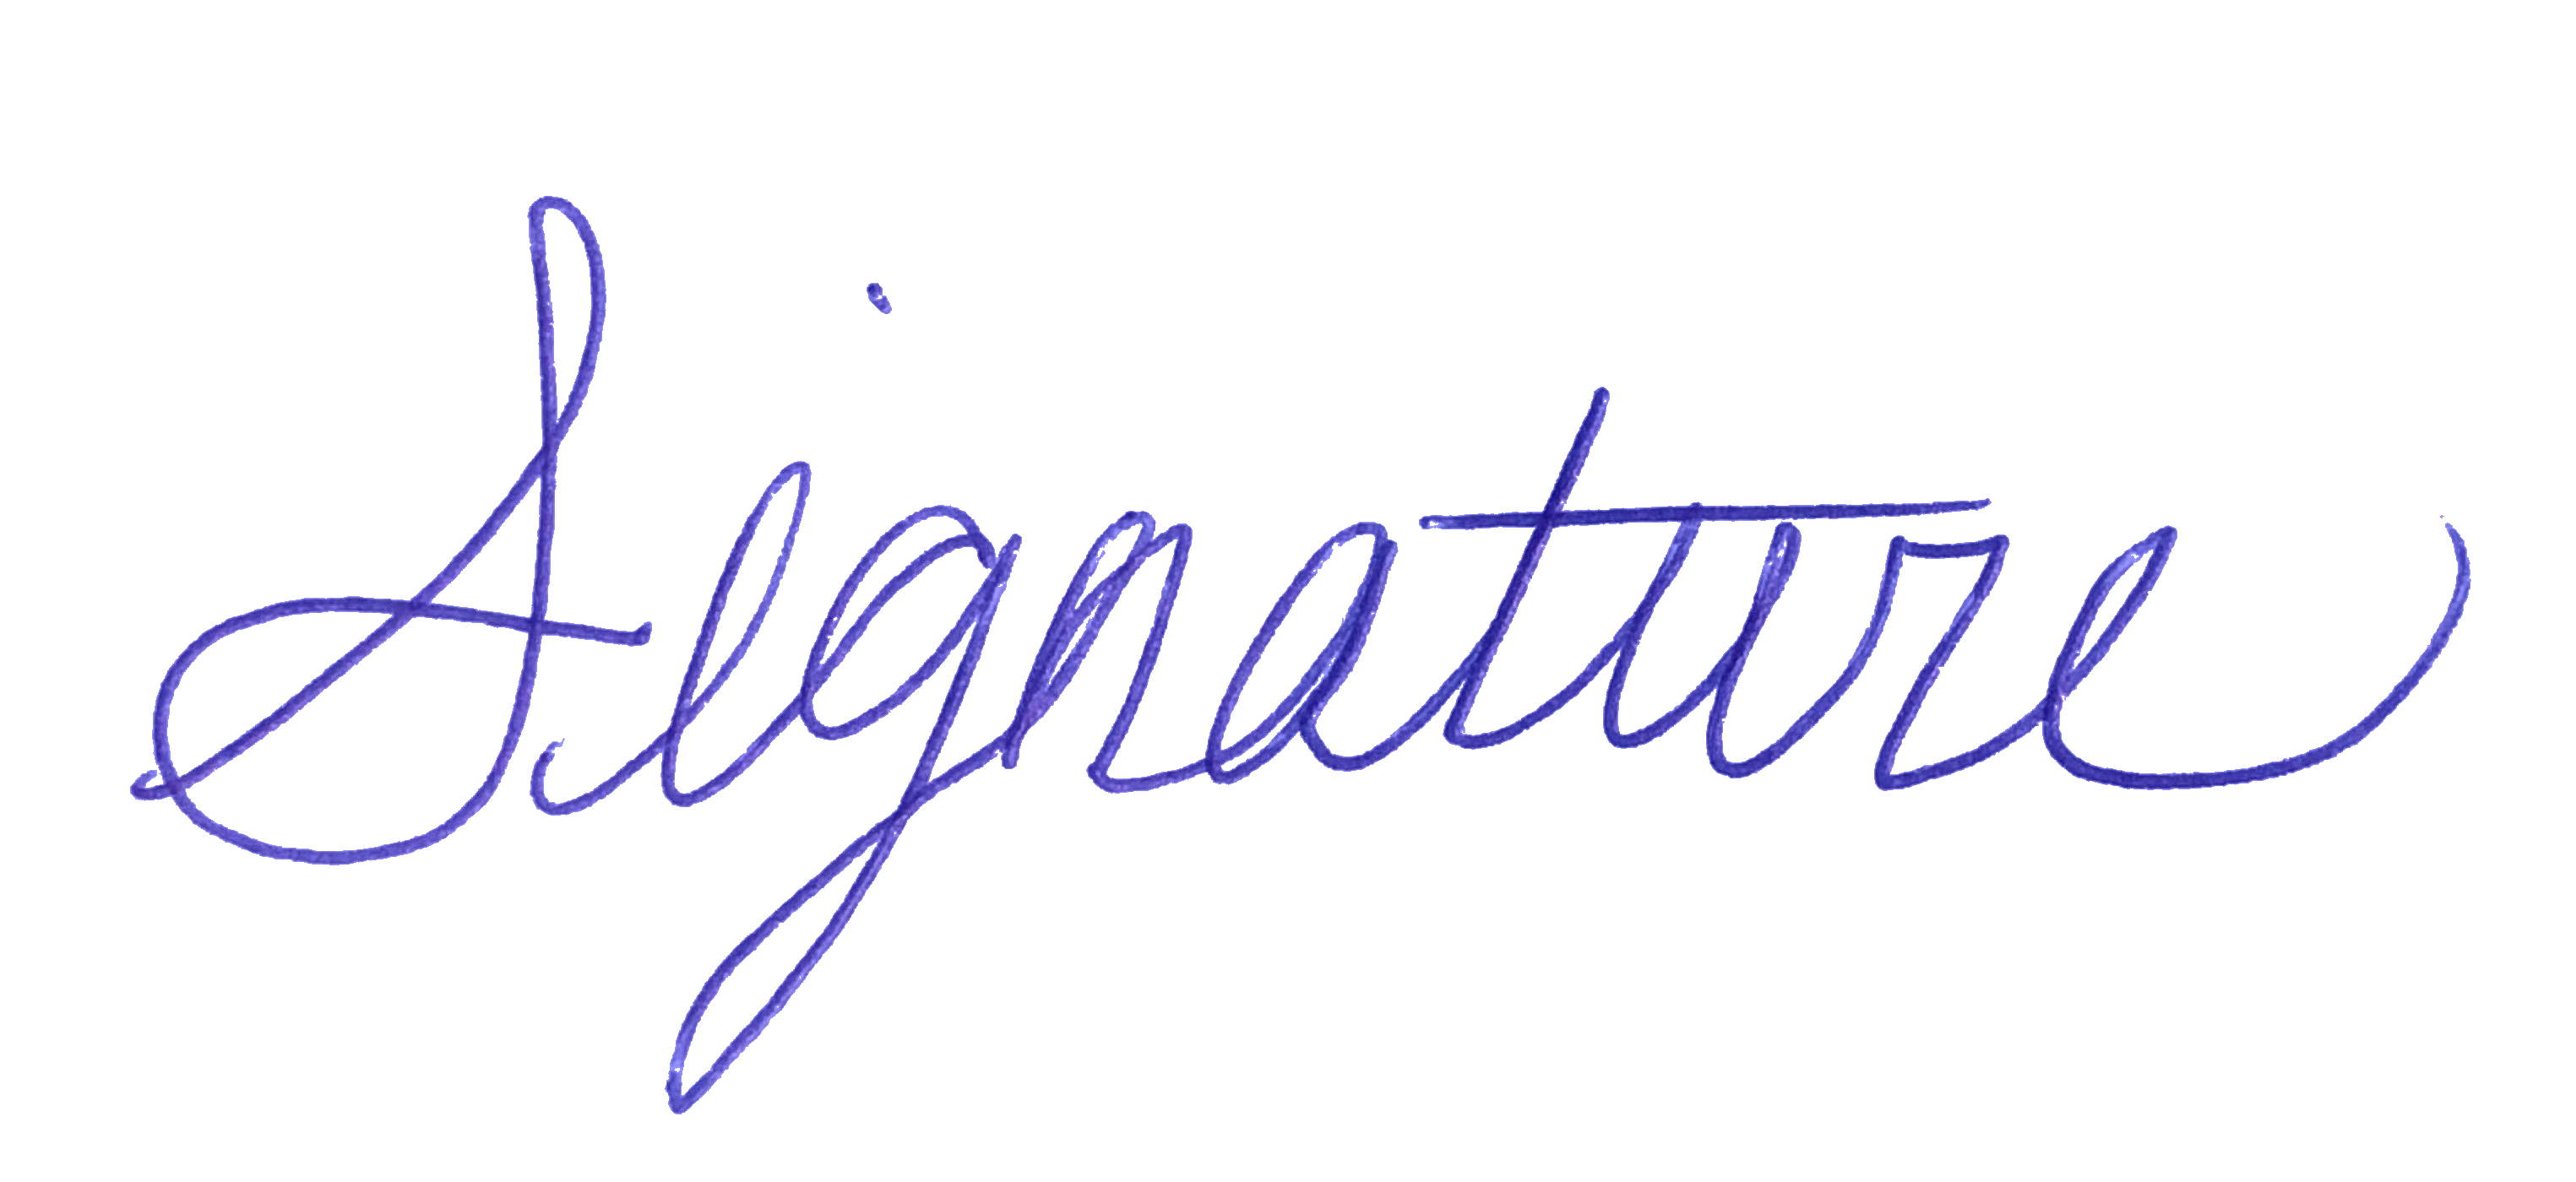

In [54]:
# Display the actual image in the browser.
Image('extracted_sig.png', width = '400')